# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
# pip install ydata-profiling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from ydata_profiling import ProfileReport

random.seed(42)
np.random.seed(42)
%matplotlib inline

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

Сиды фиксируем , чтобы результаты экспериментов всегда были одинаковыми, проверяющий получил те же метрики, что и я, можно было корректно сравнивать модели между собой

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [3]:
import pandas as pd

In [4]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [5]:
# 30 случайных строк
df_train.sample(30, random_state=42)

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   
132          Mercedes-Benz S-Class S 350 CDI  2017        5850000      47000   
6974  Fiat Grande Punto 1.3 Dynamic (Diesel)  2012         450000      70000   
3383                       Maruti Ertiga VDI  2012         550000      67000   
5947                     Mahindra Bolero GLX  2006         200000     120000   
4970                Ford Fiesta 1.4 SXi TDCi  2009         180000     163000   
4260                    Maruti SX4 Zxi BSIII  2010         300000      50000   
5861                    Ford Figo Petrol LXI  2012         290000      25000   
2264                   Tata Safari Storme EX  2015         503000     110000   
1941                        Maruti Swift VXI  2018         550000      24400   
763    Ford Fiesta Classic 1.4 Duratorq CLXI  2012         300000      64000   
5384                Maruti Alto 800 LXI BSIV  2016         275000      38000   
3044              BMW X4 M Sport X xDrive20d  2019        5400000       7500   
6575    Ford EcoSport 1.5 TDCi Titanium BSIV  2017         934000     101000   
101                     Hyundai Verna 1.6 SX  2013         522000     150000   
3626                 Maruti Baleno Alpha 1.3  2018         740000      38817   
1371                        Mahindra Xylo D2  2011         450000      56000   
625                    Honda CR-V 2.4 4WD AT  2007         325000      70000   
3915            Mahindra TUV 300 mHAWK100 T8  2017         725000     100000   
1075                 Maruti Wagon R VXi BSII  2012         225000      80000   
6739               Tata Manza Aura Quadrajet  2010         110000      88000   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   
132   Diesel            Dealer    Automatic   First Owner   13.5 kmpl   
6974  Diesel        Individual       Manual   First Owner   20.3 kmpl   
3383  Diesel        Individual       Manual   First Owner  20.77 kmpl   
5947  Diesel        Individual       Manual  Second Owner         NaN   
4970  Diesel            Dealer       Manual   First Owner         NaN   
4260  Petrol        Individual       Manual   First Owner   15.0 kmpl   
5861  Petrol        Individual       Manual   First Owner   15.6 kmpl   
2264  Diesel        Individual       Manual   First Owner   14.1 kmpl   
1941  Petrol        Individual       Manual   First Owner   22.0 kmpl   
763   Diesel        Individual       Manual  Second Owner   17.8 kmpl   
5384  Petrol            De

In [6]:
# первые 5
df_test.head(5)

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


In [8]:
# последние 5
df_test.tail(5)

name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0

In [9]:
df_train.isna().sum()[df_train.isna().sum() > 0]

mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64

In [10]:
df_test.isna().sum()[df_test.isna().sum() > 0]

mileage      19
engine       19
max_power    19
torque       19
seats        19
dtype: int64

In [11]:
# В датасете есть пропуски в столбцах: 'mileage', 'engine', 'max_power', 'torque', 'seats'

In [12]:
# дубликаты
df_train.duplicated().sum()

np.int64(985)

In [13]:
df_test.duplicated().sum()

np.int64(62)

**Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?**\
Можно:
- общую структуру данных (колонки, типы, формат)
- примерные диапазоны значений
- понять, есть ли странные записи
- оценить качество данных вручную

Нельзя:
- делать статистические выводы
- смотреть закономерности и распределения
- делать выводы о редких случаях

**Достаточно ли метода duplicated для анализа дубликатов? Почему?**\
Нет, недостаточно.
`df.duplicated()` ищет только полные совпадения строк.
Но в данных могут быть частичные дубликаты: одинаковое признаковое описание (одна и та же машина), но разные значения selling_price или других полей.

In [14]:
profile = ProfileReport(df_train, title="Cars Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:00<00:00, 83.52it/s][A


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [15]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [16]:
# Так как в колонках 'mileage', 'engine', 'max_power' нечисловой тип данных, надо привести к числовому, убрав единицы измерения
# в стобце 'torque' текстовые данные, поэтому заполнять пропуски не будем

In [17]:
cols = ['mileage', 'engine', 'max_power']

for col in cols:
    s_train = df_train[col].astype(str).str.split().str[0]
    s_test  = df_test[col].astype(str).str.split().str[0]

    df_train[col] = pd.to_numeric(s_train, errors='coerce') # для избежания ошибок с nan
    df_test[col]  = pd.to_numeric(s_test, errors='coerce')


In [18]:
# сохраню данные до замены пропусков для дальнейшего анализа и сравнения
df_train0 = df_train.copy()
df_test0 = df_test.copy()

In [19]:
cols_to_num = ['mileage', 'engine', 'max_power', 'seats']

medians = df_train[cols_to_num].median()

df_train[cols_to_num ] = df_train[cols_to_num ].fillna(medians)
df_test[cols_to_num ]  = df_test[cols_to_num ].fillna(medians)

### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [20]:
features = df_train.columns.drop('selling_price')

In [21]:
mask_dups = df_train.duplicated(subset=features, keep=False)
mask_dups.sum()

np.int64(1799)

In [22]:
df_train[mask_dups].sort_values(list(features)).head(10)

name  year  selling_price  km_driven  \
1703  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
6307  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
1836               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
6704               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
117             Audi Q5 35TDI Premium Plus  2018        3975000      31800   
1337            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
1595            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
2787            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
4485            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
6640            Audi Q5 35TDI Premium Plus  2018        3975000      31800   

        fuel seller_type transmission        owner  mileage  engine  \
1703  Diesel      Dealer    Automatic  First Owner    15.73  1968.0   
6307  Diesel      Dealer    Automatic  First Owner    15.73  1968.0   
1836  Diesel  Individual    Automatic  First Owner    13.22  2967.0   
6704  Diesel  Individual    Automatic  First Owner    13.22  2967.0   
117   Diesel      Dealer    Automatic  First Owner    17.01  1968.0   
1337  Diesel      Dealer    Automatic  First Owner    17.01  1968.0   
1595  Diesel      Dealer    Automatic  First Owner    17.01  1968.0   
2787  Diesel      Dealer    Automatic  First Owner    17.01  1968.0   
4485  Diesel      Dealer    Automatic  First Owner    17.01  1968.0   
6640  Diesel      Dealer    Automatic  First Owner    17.01  1968.0   

      max_power               torque  seats  
1703     174.33  380Nm@ 1750-2500rpm    5.0  
6307     174.33  380Nm@ 1750-2500rpm    5.0  
1836     241.40  580Nm@ 1400-3250rpm    5.0  
6704     241.40  580Nm@ 1400-3250rpm    5.0  
117      188.00  400nm@ 1750-3000rpm    5.0  
1337     188.00  400nm@ 1750-3000rpm    5.0  
1595     188.00  400nm@ 1750-3000rpm    5.0  
2787     188.00  400nm@ 1750-3000rpm    5.0  
4485     188.00  400nm@ 1750-3000rpm    5.0  
6640     188.00  400nm@ 1750-3000rpm    5.0

In [23]:
df_train = df_train.drop_duplicates(subset=features, keep='first')

In [24]:
df_train.reset_index(drop=True, inplace=True)

In [25]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [26]:
# Приведение данных к числовому типу было выполнено на предыдущих этапах, при рассчете медианы и заполнении пропусков

In [27]:
df_train = df_train.drop(columns='torque')
df_test  = df_test.drop(columns='torque')

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [28]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats']  = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats']  = df_test['seats'].astype(int)

### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [29]:
num_cols = df_train.select_dtypes(include=['int64', 'float64']).columns

print("train — до заполнения пропусков")
display(df_train0[num_cols].describe())

print("train — после заполнения пропусков")
display(df_train[num_cols].describe())


train — до заполнения пропусков


year  selling_price     km_driven      mileage       engine  \
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000  6797.000000   
mean   2013.818403   6.395152e+05  6.958462e+04    19.426604  1458.327203   
std       4.053095   8.089419e+05  5.772400e+04     4.045692   501.183890   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.549990e+05  3.500000e+04    16.800000  1197.000000   
50%    2015.000000   4.500000e+05  6.000000e+04    19.300000  1248.000000   
75%    2017.000000   6.750000e+05  9.700000e+04    22.320000  1582.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  6802.000000  6797.000000  
mean     91.500023     5.419008  
std      35.821622     0.965767  
min       0.000000     2.000000  
25%      68.050000     5.000000  
50%      82.000000     5.000000  
75%     102.000000     5.000000  
max     400.000000    14.000000

train — после заполнения пропусков


year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.428611  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.986026   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.300000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.910782     5.426712  
std      31.639585     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.000000

In [30]:
print("test — до заполнения пропусков")
display(df_test0[num_cols].describe())

print("test — после заполнения пропусков")
display(df_test[num_cols].describe())

test — до заполнения пропусков


year  selling_price      km_driven     mileage       engine  \
count  1000.000000   1.000000e+03    1000.000000  981.000000   981.000000   
mean   2013.681000   6.179010e+05   71393.341000   19.338206  1458.882773   
std       4.012149   7.585539e+05   48486.218662    3.989872   526.228560   
min    1995.000000   3.100000e+04    1303.000000    0.000000   624.000000   
25%    2011.000000   2.500000e+05   37000.000000   16.500000  1197.000000   
50%    2014.000000   4.349990e+05   61500.000000   19.330000  1248.000000   
75%    2017.000000   6.700000e+05  100000.000000   22.320000  1582.000000   
max    2020.000000   6.000000e+06  375000.000000   32.260000  3604.000000   

        max_power       seats  
count  981.000000  981.000000  
mean    91.015627    5.410805  
std     35.207383    0.919985  
min     34.200000    4.000000  
25%     69.000000    5.000000  
50%     83.100000    5.000000  
75%    102.000000    5.000000  
max    280.000000    9.000000

test — после заполнения пропусков


year  selling_price      km_driven      mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.000000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.337480  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.951751   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.000000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.550000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.300000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.300000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.260000  3604.00000   

         max_power        seats  
count  1000.000000  1000.000000  
mean     90.844330     5.403000  
std      34.892709     0.912921  
min      34.200000     4.000000  
25%      69.000000     5.000000  
50%      82.425000     5.000000  
75%     102.000000     5.000000  
max     280.000000     9.000000

In [31]:
cat_cols = df_train.select_dtypes(include=['object']).columns

print("train - категориальные признаки")
display(df_train[cat_cols].describe())

print("test - категориальные признаки:")
display(df_test[cat_cols].describe())

train - категориальные признаки


name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

test - категориальные признаки:


name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

Числовые признаки (train).\
Средние значения, медианы, минимумы и максимумы по основным признакам почти не изменились. Заполнение медианами не исказило исходные распределения признаков.

Числовые признаки (test).\
Распределения числовых признаков очень похожи на train: средние, медианы и стандартные отклонения находятся в тех же диапазонах. Это говорит о том, что train и test принадлежат одной совокупности, и модель, обученная на train, должна хорошо работать на test.

Категориальные признаки.\
Наиболее частые категории в test и train совпадают. Частоты этих категорий отличаются лишь масштабом. Это значит, что распределения категориальных признаков в train и test согласованы.

In [32]:
# assert df_train.shape == (5840, 13)

In [33]:
# так как столбец torque был удален, столбцов осталось 12, а не 13
df_train.shape

(5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

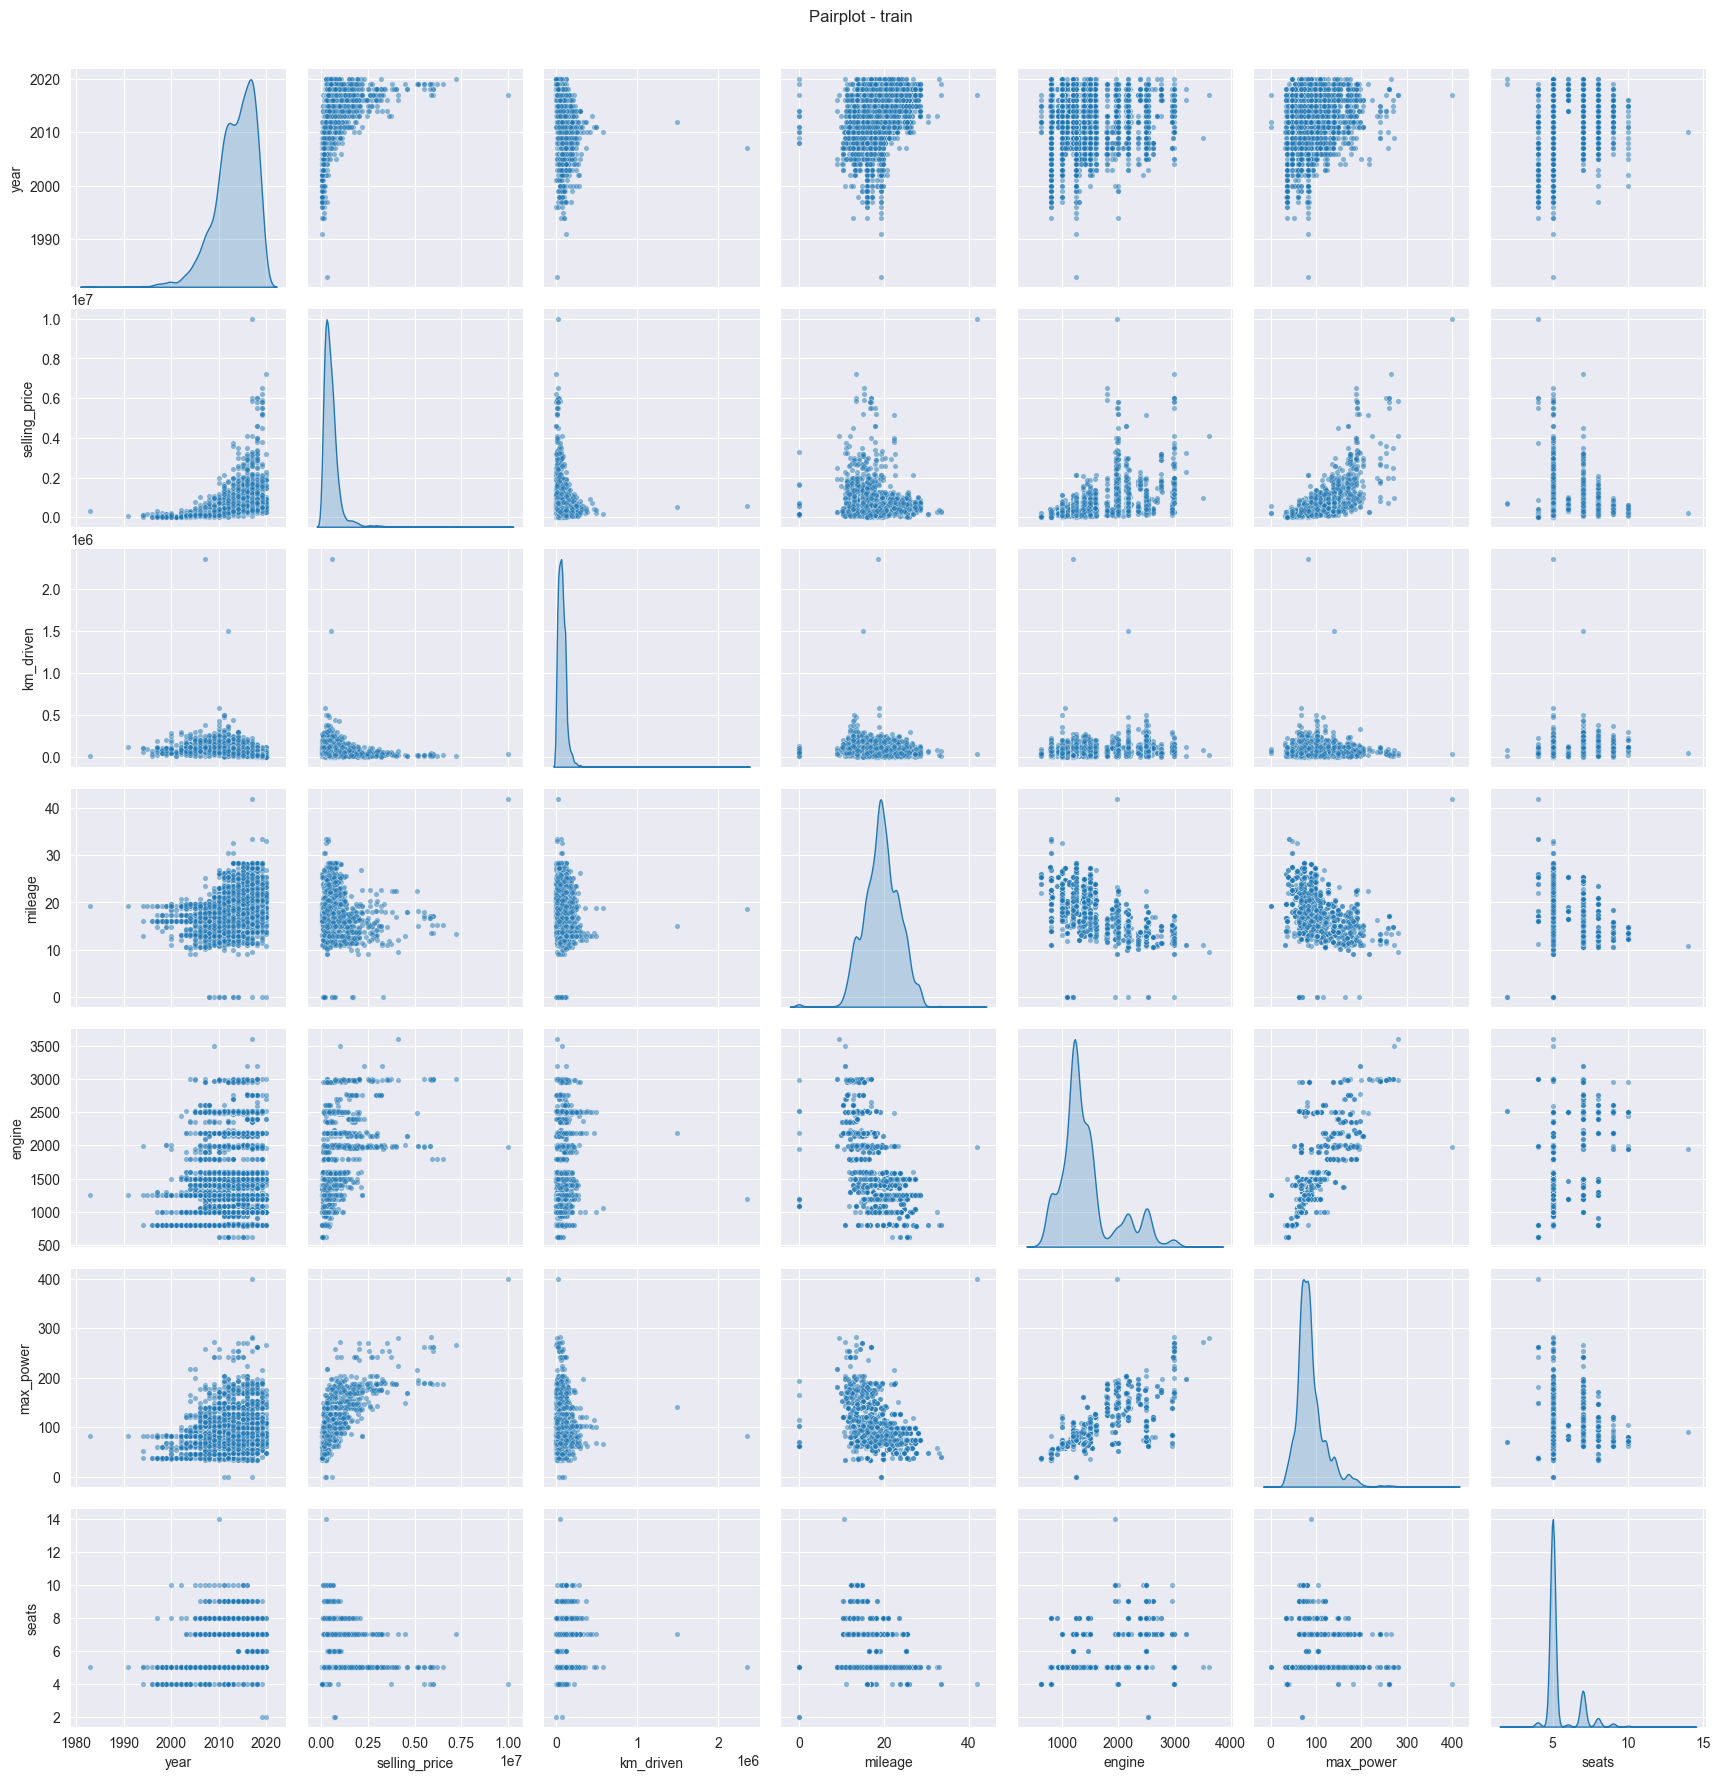

In [34]:
sns.pairplot(df_train[num_cols], diag_kind='kde', plot_kws={'alpha':0.5, 's':15})
plt.suptitle("Pairplot - train", y=1.02)
plt.show()

**1. Связь признаков с целевой переменной.**
На графиках видно, что цена лучше всего растёт с max_power, engine и year.
km_driven показывает слабую обратную связь, а mileage и seats почти не влияют.

**2. Корреляции между признаками.**
Самая сильная — между engine и max_power.
Также заметна слабая связь year и km_driven.

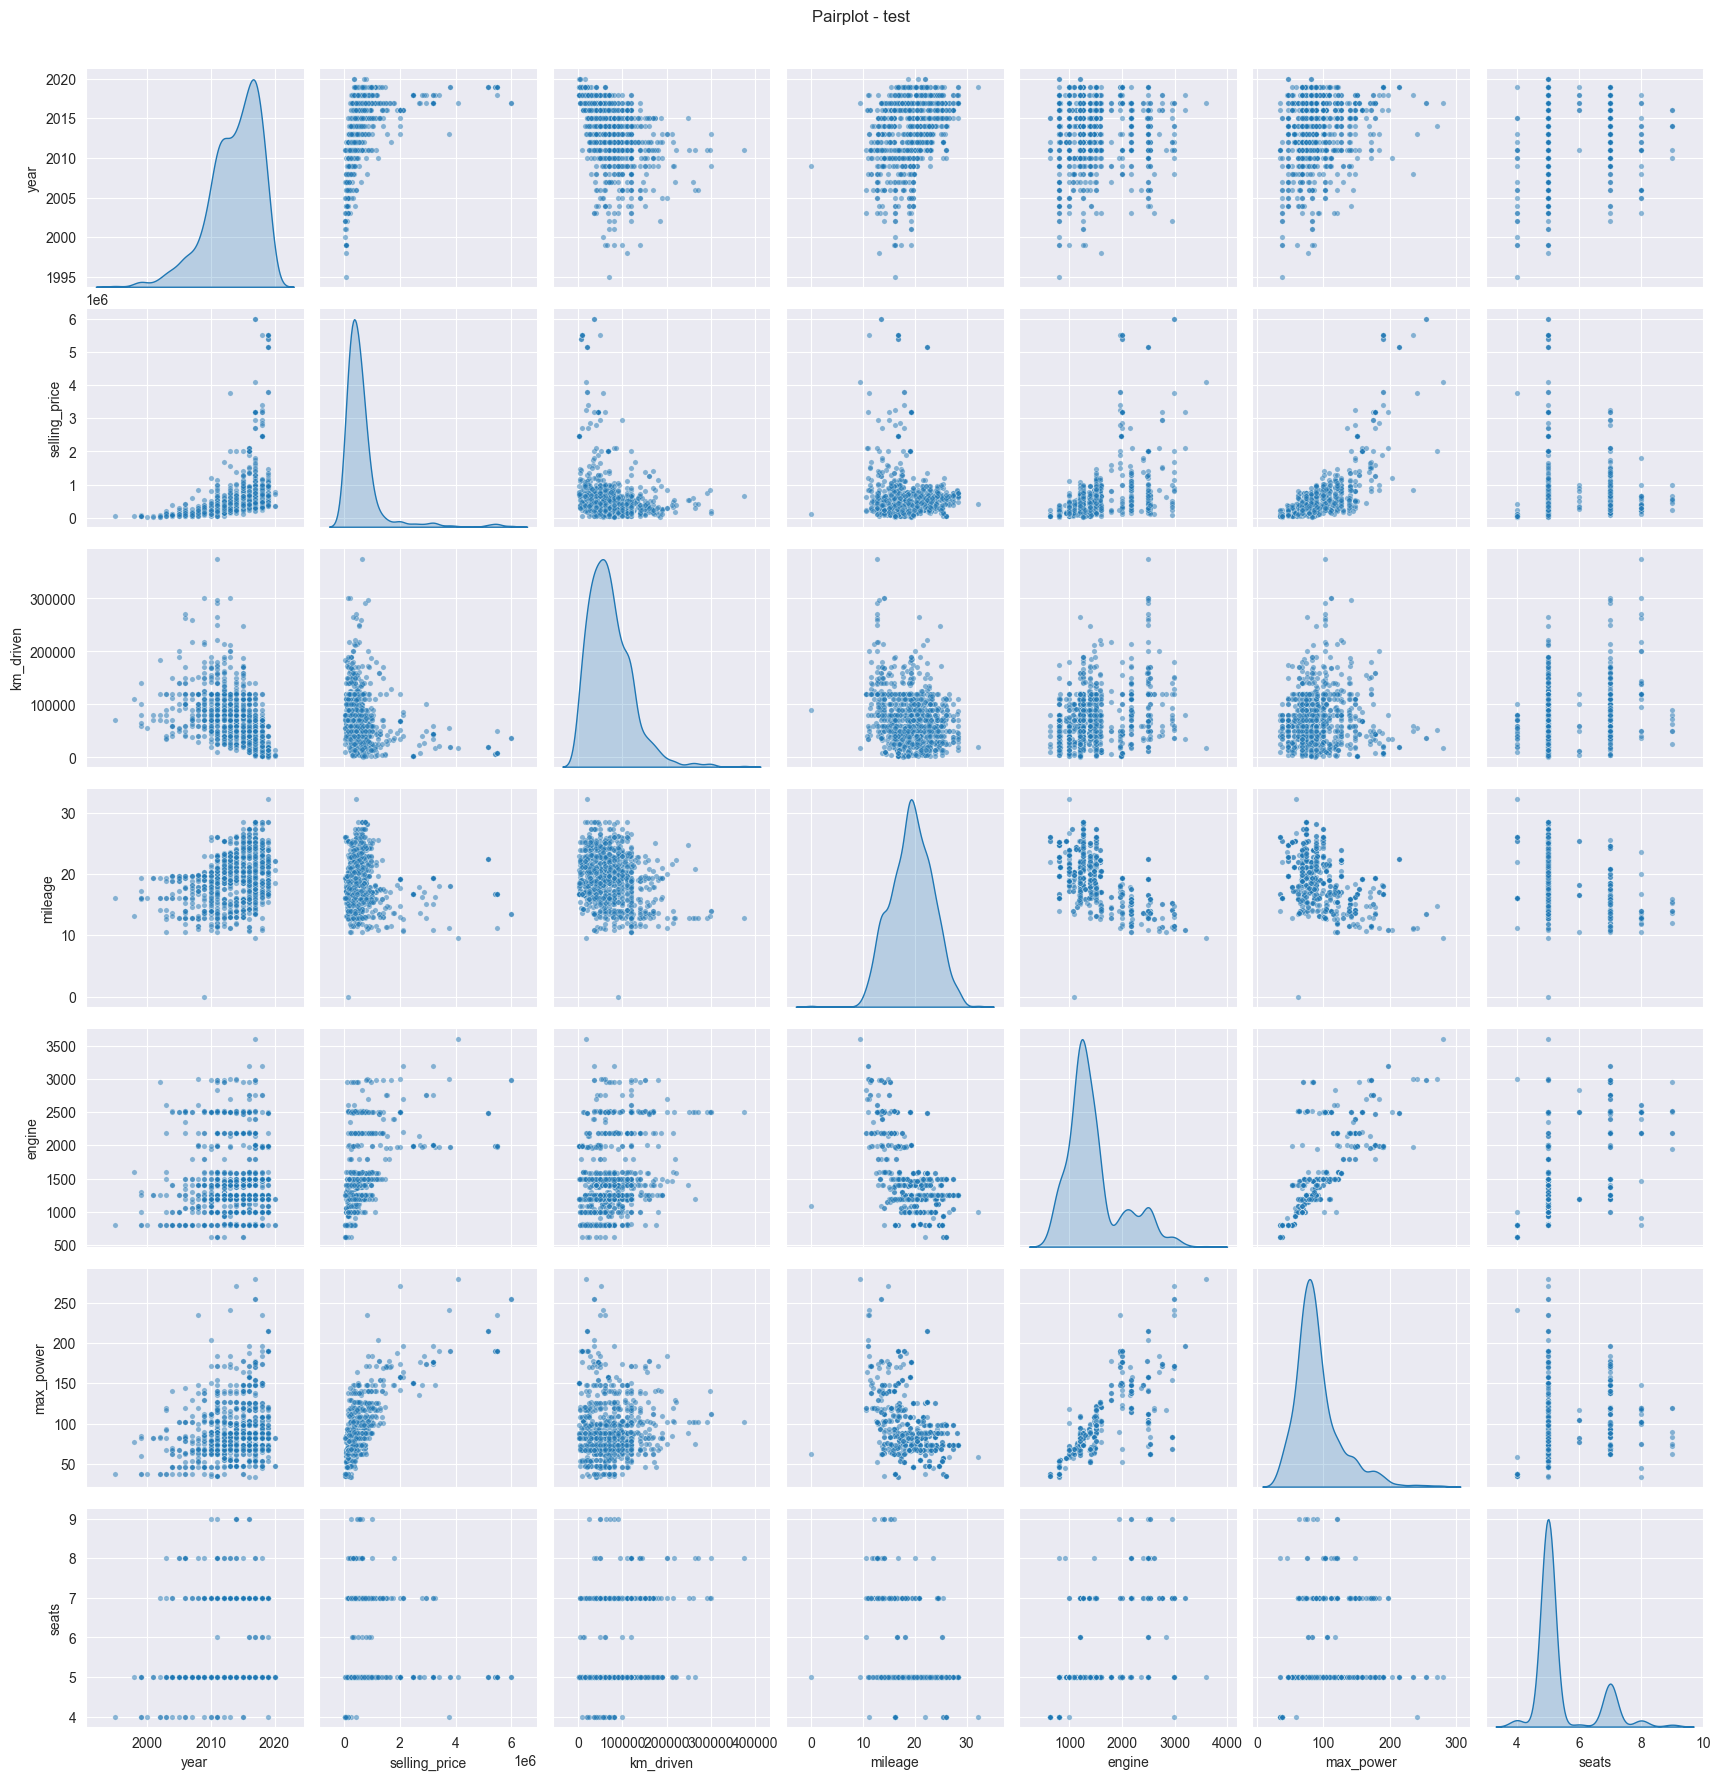

In [35]:
sns.pairplot(df_test[num_cols], diag_kind='kde', plot_kws={'alpha':0.5, 's':15})
plt.suptitle("Pairplot - test", y=1.02)
plt.show()

Распределения признаков и форма зависимостей такие же, как в train.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [36]:
corr_matrix = df_train[num_cols].corr(method='pearson')
corr_matrix

year  selling_price  km_driven   mileage    engine  \
year           1.000000       0.427279  -0.368966  0.342172  0.002819   
selling_price  0.427279       1.000000  -0.164828 -0.104458  0.447672   
km_driven     -0.368966      -0.164828   1.000000 -0.182245  0.229766   
mileage        0.342172      -0.104458  -0.182245  1.000000 -0.572677   
engine         0.002819       0.447672   0.229766 -0.572677  1.000000   
max_power      0.156648       0.692754   0.024630 -0.373271  0.681082   
seats          0.041178       0.149953   0.192328 -0.450810  0.652172   

               max_power     seats  
year            0.156648  0.041178  
selling_price   0.692754  0.149953  
km_driven       0.024630  0.192328  
mileage        -0.373271 -0.450810  
engine          0.681082  0.652172  
max_power       1.000000  0.244060  
seats           0.244060  1.000000

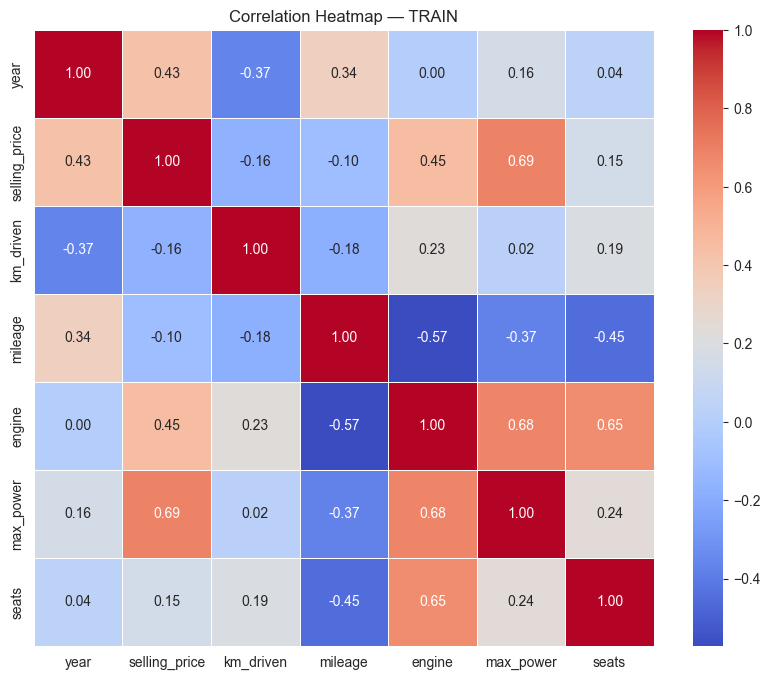

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Heatmap — TRAIN")
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Самая слабая связь — между year и engine (корреляция около 0).
Также почти нет связи между km_driven и max_power.

Самая выраженная положительная корреляция — между max_power и engine.
Обе характеристики логично растут одновременно.

Корреляция year и km_driven отрицательная, поэтому утверждение
«чем старше машина, тем больше пробег» в среднем верно

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

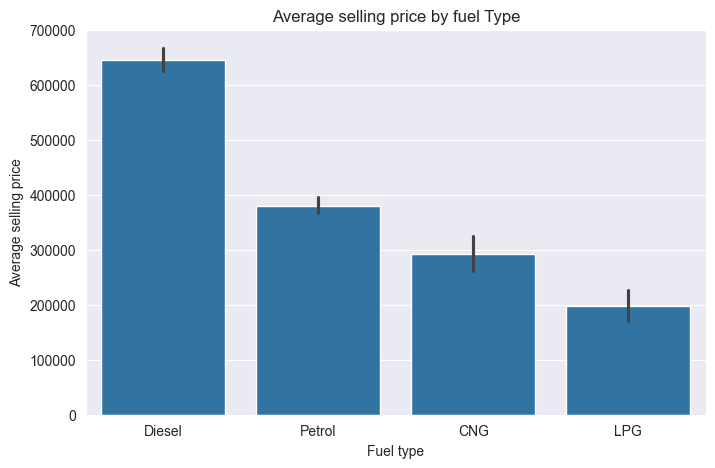

In [38]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x='fuel',
    y='selling_price',
    data=df_train,
    estimator=np.mean,
    order=df_train.groupby('fuel')['selling_price'].mean().sort_values(ascending=False).index
)
plt.title("Average selling price by fuel Type")
plt.xlabel("Fuel type")
plt.ylabel("Average selling price")
plt.show()


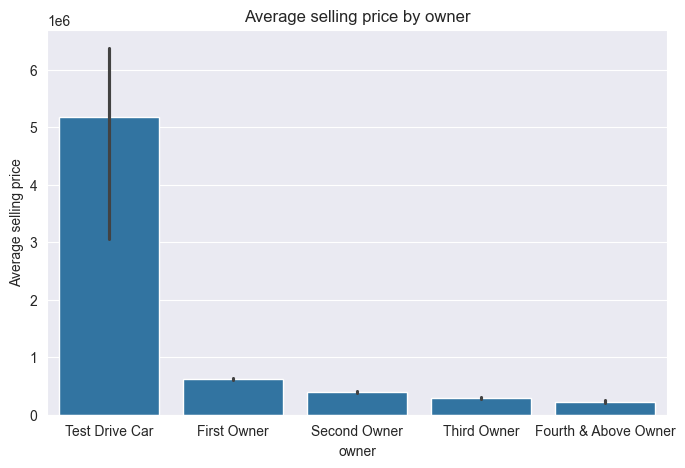

In [39]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x='owner',
    y='selling_price',
    data=df_train,
    estimator=np.mean,
    order=df_train.groupby('owner')['selling_price'].mean().sort_values(ascending=False).index
)
plt.title("Average selling price by owner")
plt.xlabel("owner")
plt.ylabel("Average selling price")
plt.show()


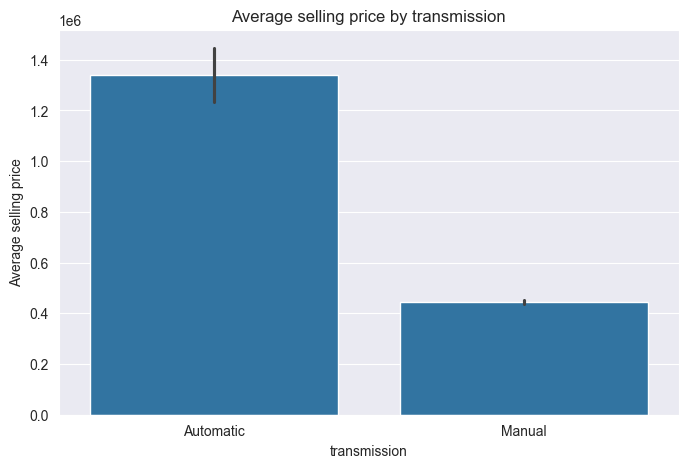

In [40]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x='transmission',
    y='selling_price',
    data=df_train,
    estimator=np.mean,
    order=df_train.groupby('transmission')['selling_price'].mean().sort_values(ascending=False).index
)
plt.title("Average selling price by transmission")
plt.xlabel("transmission")
plt.ylabel("Average selling price")
plt.show()


Я построила дополнительные визуализации по категориальным признакам fuel, owner и transmission.
На всех графиках видно, что каждая категория влияет на среднюю цену

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [41]:
df_train_num = df_train[num_cols].copy()
df_test_num  = df_test[num_cols].copy()

In [42]:
y_train = df_train_num['selling_price']
X_train = df_train_num.drop(columns=['selling_price'])

In [43]:
y_test = df_test_num['selling_price']
X_test = df_test_num.drop(columns=['selling_price'])

В качестве вещественных признаков я использовала только числовые столбцы: year, km_driven, mileage, engine, max_power, seats.
Целевой признак selling_price был отделён от признаков.

Вещественные признаки в модели:
- year — год выпуска автомобиля
- km_driven — пробег
- mileage — расход топлива
- engine — объём двигателя
- max_power — максимальная мощность
- seats — количество сидений

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

In [45]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [46]:
y_train_pred = lr.predict(X_train)
y_test_pred  = lr.predict(X_test)

In [47]:
r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)

mse_train = MSE(y_train, y_train_pred)
mse_test  = MSE(y_test, y_test_pred)

In [48]:
print(f"R2 (train): {r2_train:.4f}")
print(f"R2 (test):  {r2_test:.4f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test):  {mse_test:.2f}")

R2 (train): 0.5923
R2 (test):  0.5941
MSE (train): 116873067751.52
MSE (test):  233297548204.61


Значения R2 на train и test почти одинаковые, что говорит об отсутствии переобучения.
Но значение R2 не очень большое, модель объясняет примерно 59% вариации цены.
MSE на тесте примерно в два раза выше, чем на трейне.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [50]:
lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [51]:
y_train_pred_scaled = lr_scaled.predict(X_train_scaled)
y_test_pred_scaled  = lr_scaled.predict(X_test_scaled)

In [52]:
r2_train_scaled = r2_score(y_train, y_train_pred_scaled)
r2_test_scaled  = r2_score(y_test, y_test_pred_scaled)

mse_train_scaled = MSE(y_train, y_train_pred_scaled)
mse_test_scaled  = MSE(y_test, y_test_pred_scaled)

In [53]:
print(f"R2 (train): {r2_train_scaled:.4f}")
print(f"R2 (test):  {r2_test_scaled:.4f}")
print(f"MSE (train): {mse_train_scaled:.2f}")
print(f"MSE (test):  {mse_test_scaled:.2f}")

R2 (train): 0.5923
R2 (test):  0.5941
MSE (train): 116873067751.52
MSE (test):  233297548204.60


Улучшений нет

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [54]:
coeffs = pd.Series(lr_scaled.coef_, index=X_train.columns)
coeffs

year         152843.262358
km_driven    -44148.047511
mileage       28781.086595
engine        61176.857150
max_power    322779.703236
seats        -23220.570226
dtype: float64

Наиболее информативным оказался признак max_power

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [55]:
from sklearn.linear_model import Lasso

In [56]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

Lasso()

In [57]:
y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso  = lasso.predict(X_test_scaled)

In [58]:
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso  = r2_score(y_test, y_test_pred_lasso)

mse_train_lasso = MSE(y_train, y_train_pred_lasso)
mse_test_lasso  = MSE(y_test, y_test_pred_lasso)

In [59]:
print(f"R2 (train): {r2_train_lasso:.4f}")
print(f"R2 (test):  {r2_test_lasso:.4f}")
print(f"MSE (train): {mse_train_lasso:.2f}")
print(f"MSE (test):  {mse_test_lasso:.2f}")

R2 (train): 0.5923
R2 (test):  0.5941
MSE (train): 116873067761.64
MSE (test):  233298219170.76


In [60]:
coeffs = pd.Series(lasso.coef_, index=X_train.columns)
coeffs

year         152843.083853
km_driven    -44146.918538
mileage       28779.204085
engine        61172.025780
max_power    322780.586197
seats        -23217.693273
dtype: float64

Качество Lasso-регрессии оказалось почти таким же (даже немного хуже по MSE), чем у обычной линейной модели.
Коэффициенты Lasso не занулились — регуляризации по умолчанию недостаточно, чтобы "отбросить" какие-либо признаки. Все шесть признаков вносят вклад в модель.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
alpha_grid = np.logspace(-5, 5, 50)
param_grid = {'alpha': alpha_grid}

In [63]:
lasso_model = Lasso(max_iter=10000)

grid = GridSearchCV(
    estimator=lasso_model,
    param_grid=param_grid,
    cv=10,
    scoring='neg_mean_squared_error'
)

grid.fit(X_train_scaled, y_train)

print("Лучшие параметры:", grid.best_params_)

Лучшие параметры: {'alpha': np.float64(910.2981779915227)}


In [64]:
best_lasso = grid.best_estimator_

y_train_pred_lasso_best = best_lasso.predict(X_train_scaled)
y_test_pred_lasso_best  = best_lasso.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred_lasso_best)
r2_test  = r2_score(y_test, y_test_pred_lasso_best)

mse_train = MSE(y_train, y_train_pred_lasso_best)
mse_test  = MSE(y_test, y_test_pred_lasso_best)

In [65]:
print(f"R2 (train): {r2_train:.4f}")
print(f"R2 (test):  {r2_test:.4f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test):  {mse_test:.2f}")

R2 (train): 0.5922
R2 (test):  0.5931
MSE (train): 116881224603.97
MSE (test):  233914737026.67


In [66]:
n_alphas = len(alpha_grid)
n_folds = 10
print("Количество обученных моделей:", n_alphas * n_folds)

Количество обученных моделей: 500


In [67]:
coeffs = pd.Series(best_lasso.coef_, index=X_train.columns)
coeffs

year         152646.285484
km_driven    -43141.309465
mileage       27124.046233
engine        56862.254957
max_power    323561.355207
seats        -20619.701212
dtype: float64

Никакие из коффициентов не занулились, качество не улучшилось

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [68]:
from sklearn.linear_model import ElasticNet

In [69]:
alpha_grid = np.logspace(-5, 5, 50)
l1_grid = np.linspace(0.0, 1.0, 11)

param_grid = {
    'alpha': alpha_grid,
    'l1_ratio': l1_grid
}

In [70]:
en = ElasticNet(max_iter=10000)

grid_en = GridSearchCV(
    estimator=en,
    param_grid=param_grid,
    cv=10,
    scoring='neg_mean_squared_error',
)

grid_en.fit(X_train_scaled, y_train)

C:\Users\alina\PycharmProjects\JupyterProject\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.541e+14, tolerance: 1.247e+11
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\alina\PycharmProjects\JupyterProject\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.193e+14, tolerance: 1.564e+11
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solv

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
       6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
       4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
       2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
       1.84206997e-02, 2.94705170e-...
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05]),
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='neg_mean_squared_error')

In [71]:
print("Лучшие параметры:", grid_en.best_params_)

Лучшие параметры: {'alpha': np.float64(0.04714866363457394), 'l1_ratio': np.float64(0.7000000000000001)}


In [72]:
best_en = grid_en.best_estimator_

y_train_pred_en = best_en.predict(X_train_scaled)
y_test_pred_en  = best_en.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred_en)
r2_test  = r2_score(y_test, y_test_pred_en)

mse_train = MSE(y_train, y_train_pred_en)
mse_test  = MSE(y_test, y_test_pred_en)

In [73]:
print(f"R2 (train): {r2_train:.4f}")
print(f"R2 (test):  {r2_test:.4f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test):  {mse_test:.2f}")

R2 (train): 0.5922
R2 (test):  0.5910
MSE (train): 116903404366.36
MSE (test):  235085703638.73


In [74]:
coeffs = pd.Series(best_en.coef_, index=X_train.columns)
coeffs

year         152010.773264
km_driven    -44610.700297
mileage       27871.180441
engine        65454.651866
max_power    315436.686897
seats        -24163.412165
dtype: float64

Никакие из коффициентов не занулились, качество не улучшилось

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [75]:
df_train = df_train.drop(columns=['name'])
df_test  = df_test.drop(columns=['name'])

Так как в последующих заданиях идет уже обучение модели, на этом этапе также необходимо создать X_train_cat и X_test_cat. Для этого надо  к уже имеющимся числовым данным (стандартизированным?) добавить категориальные

In [76]:
cat_cols = df_train.select_dtypes(include='object').columns

X_train_num_scaled = pd.DataFrame(
    X_train_scaled, columns=X_train.columns, index=df_train.index
)
X_test_num_scaled = pd.DataFrame(
    X_test_scaled, columns=X_test.columns, index=df_test.index
)

X_train_cat = pd.concat([X_train_num_scaled, df_train[cat_cols]], axis=1)
X_test_cat  = pd.concat([X_test_num_scaled, df_test[cat_cols]], axis=1)


In [77]:
X_train_cat.head()

year  km_driven   mileage    engine  max_power     seats    fuel  \
0  0.139570   1.191152  0.996413 -0.373643  -0.439701 -0.434419  Diesel   
1  0.139570   0.766619  0.429384  0.141162   0.493387 -0.434419  Diesel   
2 -0.837167   0.883158  0.896054 -0.068879   0.066037 -0.434419  Diesel   
3 -1.569719   0.766619 -0.835142 -0.270682   0.009142 -0.434419  Petrol   
4  0.872122  -0.482007  0.178486 -0.478663  -0.191257 -0.434419  Petrol   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual  Second Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual   First Owner

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [78]:
assert X_train_cat.shape == (5840, 10)

In [79]:
X_train_cat.describe(include='object')

fuel seller_type transmission        owner
count     5840        5840         5840         5840
unique       4           3            2            5
top     Diesel  Individual       Manual  First Owner
freq      3177        5223         5336         3603

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [80]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

In [81]:
ohe_cols = ['seats'] + list(cat_cols)

In [82]:
X_train_ohe = pd.get_dummies(
    X_train_cat,
    columns=ohe_cols,
    drop_first=True  # избегаем мультиколлинеарности
)

X_test_ohe = pd.get_dummies(
    X_test_cat,
    columns=ohe_cols,
    drop_first=True
)

In [83]:
X_test_ohe = X_test_ohe.reindex(columns=X_train_ohe.columns, fill_value=0)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [84]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [85]:
alpha_grid = np.logspace(-5, 5, 50)
param_grid = {'alpha': alpha_grid}

In [86]:
ridge = Ridge()

grid_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    cv=10,
    scoring='r2'
)

In [87]:
grid_ridge.fit(X_train_ohe, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
       6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
       4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
       2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
       1.84206997e-02, 2.94705170e-02, 4.71486636e-02, 7...
       7.90604321e-01, 1.26485522e+00, 2.02358965e+00, 3.23745754e+00,
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05])},
             scoring='r2')

In [88]:
print("Лучшие параметры:", grid_ridge.best_params_)
print("Лучший средний R2", grid_ridge.best_score_)

Лучшие параметры: {'alpha': np.float64(8.286427728546842)}
Лучший средний R2 0.6221179948458042


In [89]:
best_ridge = grid_ridge.best_estimator_

y_train_pred_ridge = best_ridge.predict(X_train_ohe)
y_test_pred_ridge  = best_ridge.predict(X_test_ohe)

r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge  = r2_score(y_test, y_test_pred_ridge)

mse_train_ridge = MSE(y_train, y_train_pred_ridge)
mse_test_ridge  = MSE(y_test, y_test_pred_ridge)


In [90]:
print(f"R2 (train): {r2_train_ridge:.4f}")
print(f"R2 (test):  {r2_test_ridge:.4f}")
print(f"MSE (train): {mse_train_ridge:.2f}")
print(f"MSE (test):  {mse_test_ridge:.2f}")

R2 (train): 0.6553
R2 (test):  0.6410
MSE (train): 98809927992.73
MSE (test):  206368304660.90


# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [91]:
def business_metric(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    rel_err = np.abs(y_pred - y_true) / y_true

    return (rel_err <= 0.10).mean()


In [92]:
print("LR (только числовые):", business_metric(y_test, y_test_pred))
print("LR (scaled):", business_metric(y_test, y_test_pred_scaled))
print("Lasso:", business_metric(y_test, y_test_pred_lasso))
print("Lasso (best):", business_metric(y_test, y_test_pred_lasso_best))
print("ElasticNet (best):", business_metric(y_test, y_test_pred_en))
print("Ridge + OHE (best): ", business_metric(y_test, y_test_pred_ridge))


LR (только числовые): 0.227
LR (scaled): 0.227
Lasso: 0.227
Lasso (best): 0.226
ElasticNet (best): 0.223
Ridge + OHE (best):  0.247


По бизнес-метрике наилучший результат показала модель Ridge со значением метрики 0.247

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

In [ ]:
# Объединю все в единый пайплайн

In [101]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

In [96]:
num_cols = ["year", "km_driven", "mileage", "engine", "max_power"]
cat_cols = ["fuel", "seller_type", "transmission", "owner", "seats"]

X_train_raw = df_train.drop(columns=["selling_price"])
y_train = df_train["selling_price"]

X_test_raw = df_test.drop(columns=["selling_price"])
y_test = df_test["selling_price"]

In [97]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols),
    ],
    remainder="drop",
    verbose_feature_names_out=False,
)

In [98]:
pipe = Pipeline([
    ("prep", preprocess),
    ("model", Ridge())
])

In [99]:
param_grid = {
    "model__alpha": np.logspace(-3, 3, 20)
}

grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=10,
    scoring="r2",
    n_jobs=-1
)

grid.fit(X_train_raw, y_train)

best_pipe = grid.best_estimator_

In [100]:
y_test_pred_pipe = best_pipe.predict(X_test_raw)

print("R2 (test):", r2_score(y_test, y_test_pred_pipe))
print("Business metric:", business_metric(y_test, y_test_pred_pipe))

R2 (test): 0.643996432521123
Business metric: 0.245


In [102]:
joblib.dump(best_pipe, "model.pkl")

['model.pkl']

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.